In [14]:
import pandas as pd
import kagglehub as kh
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [15]:
path = kh.dataset_download("mirajdeepbhandari/polynomial-regression")

dataset = pd.read_csv(f"{path}/Ice_cream selling data.csv")
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


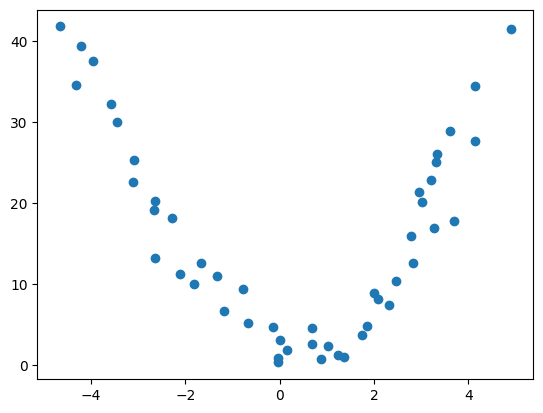

In [16]:
plt.scatter(dataset["Temperature (°C)"],dataset["Ice Cream Sales (units)"])
plt.show()

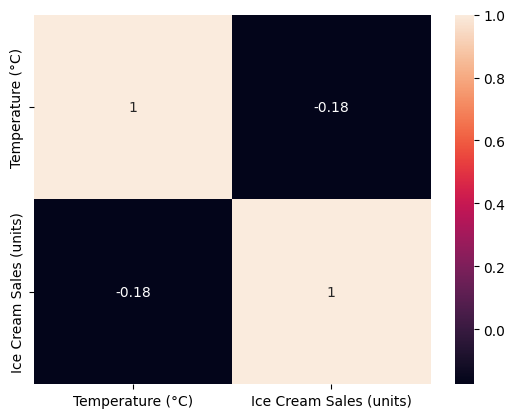

In [17]:
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [18]:
x = dataset[["Temperature (°C)"]]
y = dataset[["Ice Cream Sales (units)"]]


In [19]:
pf = PolynomialFeatures(degree=2)

x=pf.fit_transform(x)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [21]:
lr  = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
lr.score(x_test,y_test)*100

93.04773105929631

In [23]:
dataset.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [24]:
test = pf.fit_transform([[-4.662263]])
lr.predict(test)

array([[47.62225009]])

Equation
 $$
    y = b_0 + b_1x + b_2x^2 + \cdots + b_nx^n
    $$

In [25]:
print(lr.coef_,lr.intercept_)
y = (-0.71388051*-4.662263)+ ( 1.80249358*4.662263**2) + 3.18107435
print(y)

[[ 0.         -0.83763567  1.87430592]] [2.97575366]
45.68962853541114


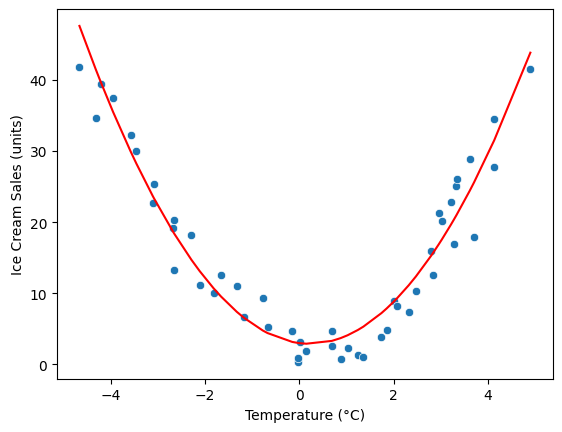

In [27]:
pred = lr.predict(x)


sns.scatterplot(x="Temperature (°C)", y="Ice Cream Sales (units)", data=dataset)
plt.plot(dataset["Temperature (°C)"], pred, c="r")
plt.show()

# Polynomial Regression: An Easy Explanation

Polynomial regression is a type of regression analysis used to model the relationship between a dependent variable (output) and an independent variable (input) as an nth degree polynomial.

---

## Why Use Polynomial Regression?

- **Linear regression** fits a straight line to the data.
- **Polynomial regression** fits a curved line, which can capture more complex relationships.

---

## How Does It Work?

The model equation looks like:

$$
y = b_0 + b_1x + b_2x^2 + b_3x^3 + \cdots + b_nx^n
$$

- $y$ = predicted value (output)
- $x$ = input variable
- $b_0, b_1, ..., b_n$ = coefficients learned by the model
- $n$ = degree of the polynomial (e.g., 2 for quadratic, 3 for cubic)

---

## When to Use Polynomial Regression?

- When your data shows a **curved** or **non-linear** trend.
- When a straight line (linear regression) does not fit the data well.

---

## Example

Suppose you want to predict ice cream sales based on temperature. If sales increase slowly at first, then rapidly, and then level off, a curve (polynomial) fits better than a straight line.

---

## Visualization

- **Linear Regression:**  
    <img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Linear Regression" width="400"/>

- **Polynomial Regression:**  
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Polynomialregression.svg/400px-Polynomialregression.svg.png" alt="Polynomial Regression" width="400"/>

---

## Key Points

- Polynomial regression can fit more complex, curved data.
- The higher the degree, the more flexible the curve—but too high can lead to overfitting.
- Always visualize your data to choose the right model.

---

**In summary:**  
Polynomial regression helps us model and predict data that follows a curved trend, making it a powerful tool for many real-world problems!